In [13]:
# import necessary libraries

# data manipulation libraries
import pandas as pd
import numpy as np 

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# stratified splitting libraries
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load data

from the UCI machine learning repository, the statlog (German Credit Data) exists without actual headers in the text file, but the data card is present to help fill out the columns names using pandas

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

In [15]:
df = pd.read_csv("statlog_german_credit_data/german.data", header=None, delim_whitespace=True)
headers = [
    "Status of existing checking account",
    "Duration in month",
    "Credit history",
    "Purpose",
    "Credit amount",
    "Savings account/bonds",
    "Present employment since",
    "Installment rate in percentage of disposable income",
    "Personal status and sex",
    "Other debtors / guarantors",
    "Present residence since",
    "Property",
    "Age in years",
    "Other installment plans",
    "Housing",
    "Number of existing credits at this bank",
    "Job",
    "Number of people being liable to provide maintenance for",
    "Telephone",
    "Foreign worker",
    "Risk"
]
df.columns = headers
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

from the `.info()` we get that:

* there are 1000 instances and 10 features
* the instances most of the features are of integer data type and the rest of object data type
* out of the 10 features, `Unnamed: 0` is an unnecessary column - it will be dropped
* the `savings accounts` and `checking account` contains missing values - which are object values

## Understanding the numerical features

In [4]:
# drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


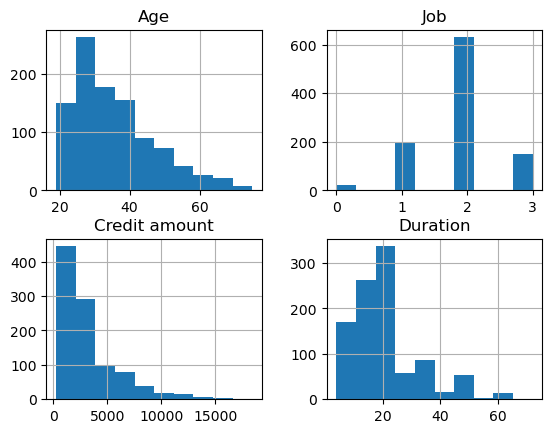

In [5]:
df.hist()
plt.show()

From the histograms of the numerical features:
* `jobs` (number of jobs) is a categorical feature which will be converted to numerical before feeding it to the model
* The rest of the features are heavily skewed to the left

Before moving forward, the data should be split first

In [6]:
# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Credit amount']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

NameError: name 'StratifiedShuffleSplit' is not defined